<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sb
import matplotlib.pyplot as pt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df = pd.read_csv("/content/drive/MyDrive/ipynb/datasets/spam.csv",\
                 encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(6)

,target,text
2596,ham,No i'm not gonna be able to. || too late notic...
1610,ham,I'll probably be around mu a lot
726,ham,Of cos can lar i'm not so ba dao ok... 1 pm lo...
4021,ham,U gd lor go shopping i got stuff to do. U wan ...
3274,ham,Hurry home u big butt. Hang up on your last ca...
2569,ham,Ultimately tor motive tui achieve korli.


In [7]:
df.iloc[3585][1]

'I am hot n horny and willing I live local to you - text a reply to hear strt back from me 150p per msg Netcollex LtdHelpDesk: 02085076972 reply Stop to end'

In [8]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

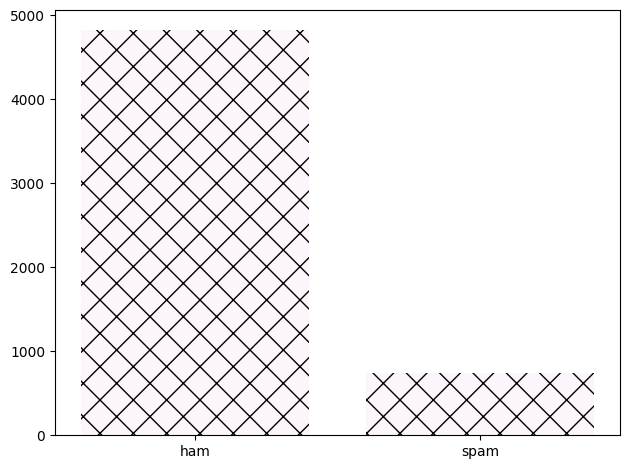

In [9]:
pt.bar(['ham', 'spam'], df['target'].value_counts(), color='orchid',\
       hatch='x', alpha=0.06)
pt.tight_layout();

In [10]:
def clean(text):
  sms = re.sub('[^a-zA-Z]', ' ', text) #Replacing all non-alphabetic characters with a space
  sms = sms.lower() #converting to lowecase
  sms = sms.split()
  sms = ' '.join(sms)
  return sms

In [11]:
df['text'] = df['text'].apply(clean)

In [12]:
df['text'].sample(6)

4795    urgent this is our nd attempt to contact u you...
4197    want to funk up ur fone with a weekly new tone...
430                               at home watching tv lor
4393    baaaaaaaabe wake up i miss you i crave you i n...
4621                 they finally came to fix the ceiling
3805    urgent we are trying to contact you last weeke...
Name: text, dtype: object

In [13]:
df["text"]=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1)

In [14]:
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  filtered_text = [word for word in text if word not in stop_words]
  return filtered_text

In [15]:
df['text'] = df['text'].apply(remove_stopwords)

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
  lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
  return lemmas
df["text"] = df["text"].apply(lemmatize_word)

In [17]:
df

,target,text
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, live, around, though]"
...,...,...
5567,spam,"[nd, time, try, contact, u, u, pound, prize, c..."
5568,ham,"[b, go, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitch, act, like, interest, buy, somethi..."


In [18]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['target'])

In [19]:
p_spam = len(x_train[y_train=='spam'])/len(x_train)
p_ham = len(x_train[y_train=='ham'])/len(x_train)

In [20]:
x_train[6]

['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']

In [21]:
len(x_train) == len(y_train)

True

In [22]:
n_spam = 0
for i in x_train.index:
  if(y_train[i] == 'spam'):
    n_spam += len(x_train[i])
n_spam

8634

In [23]:
n_ham = 0
for i in x_train.index:
  if(y_train[i] == 'ham'):
    n_ham += len(x_train[i])
n_ham

28933

In [24]:
n = int(n_ham/n_spam)
n

3

In [25]:
ham_index = x_train[y_train=='ham'].index
spam_index = x_train[y_train=='spam'].index

In [26]:
p = {}
q = {}
for i in spam_index:
  for j in x_train[i]:
    try:
      p[j] += 1
    except:
      p[j] = 1
for i in ham_index:
  for j in x_train[i]:
    try:
      q[j] += 1
    except:
      q[j] = 1

In [27]:
p.update((key, value*n) for key, value in p.items())

In [28]:
def check(sample):
  try:  #custom check
    sample = sample.lower()
    sample = sample.split()
  except:
    sample
  malt_spam = p_spam
  malt_ham = p_ham
  for i in range(len(sample)):
    valp = p.get(sample[i], n)
    valq = q.get(sample[i], 1)
    malt_spam = malt_spam*valp
    malt_ham = malt_ham*valq
    if(malt_spam>999999 or malt_ham>999999):
      malt_spam /= 1000000
      malt_ham /= 1000000
  if(malt_spam>malt_ham):
    return 'spam'
  else:
    return 'ham'

In [29]:
def predict(x_test):
  y_pred = []
  for x in x_test:
    y_pred.append(check(x))
  return y_pred

In [30]:
y_pred = predict(x_test)
y_pred[:6]

['ham', 'ham', 'ham', 'ham', 'spam', 'ham']

In [31]:
y_test[:6]

3531     ham
4454     ham
5328     ham
607      ham
1929    spam
4906     ham
Name: target, dtype: object

In [32]:
def accuracy(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i] == y_pred[i]):
      c += 1
  return c/len(y_test)

In [33]:
acc = accuracy(y_test, y_pred)*100
print(f'accuracy is {acc:.3f}%')

accuracy is 95.693%


In [34]:
def TP(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='ham' and y_pred[i]=='ham'):
      c += 1
  return c
def TN(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='spam' and y_pred[i]=='spam'):
      c += 1
  return c
def FP(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='spam' and y_pred[i]=='ham'):
      c += 1
  return c
def FN(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='ham' and y_pred[i]=='spam'):
      c += 1
  return c

In [35]:
tp = TP(y_test, y_pred)
fp = FP(y_test, y_pred)
tn = TN(y_test, y_pred)
fn = FN(y_test, y_pred)

In [36]:
def confusion_matrix(tp, tn, fp, fn):
  print('     ham','\t','spam')
  print('ham ',tp, '\t', fn)
  print()
  print('spam',fp, '\t\t', tn)

In [37]:
confusion_matrix(tp, tn, fp, fn)

     ham 	 spam
ham  1147 	 52

spam 8 		 186


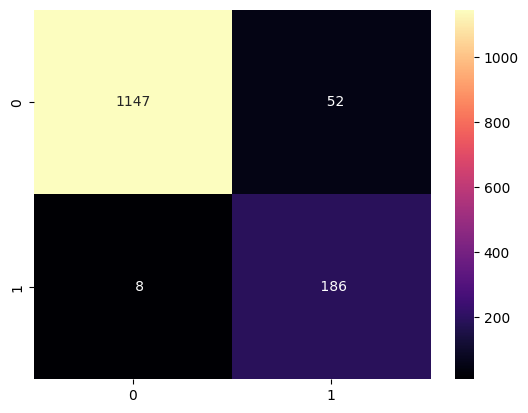

In [38]:
sb.heatmap([[tp, fn],[fp,tn]], annot=True, fmt='4', cmap='magma');

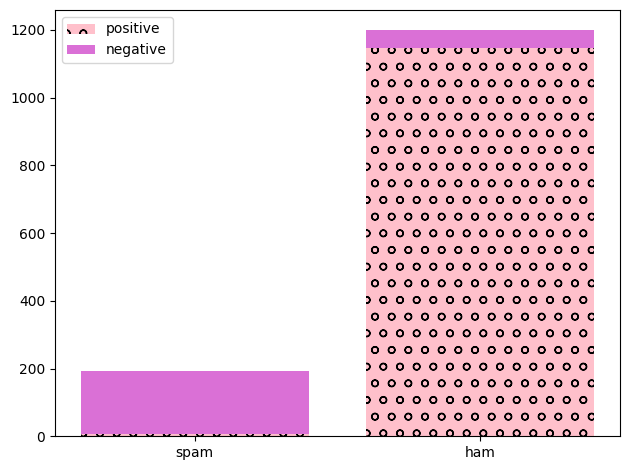

In [39]:
pt.bar(['spam','ham'], [fp, tp], color='pink', hatch='o')
pt.bar(['spam', 'ham'], [tn, fn], bottom=[fp, tp], color='orchid')
pt.legend(['positive', 'negative'])
pt.tight_layout();

In [40]:
def metrics(tp, tn, fp, fn):
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = (2*precision*recall)/(precision+recall)
  return precision*100, recall*100, f1*100

In [41]:
pc,r,f = metrics(tp, tn, fp, fn)
print(f'the precision is {pc:.3f}%')
print(f'the recall is    {r:.3f}%')
print(f'the f1-score is  {f:.3f}%')

the precision is 99.307%
the recall is    95.663%
the f1-score is  97.451%


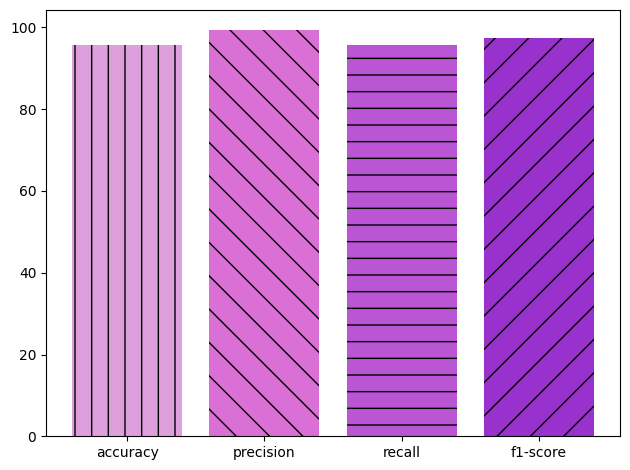

In [42]:
pt.bar(['accuracy','precision', 'recall', 'f1-score'], [acc,pc,r,f],\
       color=['plum','orchid','mediumorchid','darkorchid'], hatch=['|','\\', '-', '/'])
pt.tight_layout();

In [43]:
p = dict(sorted(p.items(), key=lambda x: x[1], reverse=True))
q = dict(sorted(q.items(), key=lambda x: x[1], reverse=True))

In [44]:
print('The top ten most significant words wrt spam are -')
for i,j in list(p.items())[:10]:
  print(i,'(',j,')',end='| ')

The top ten most significant words wrt spam are -
call ( 891 )| free ( 495 )| u ( 441 )| p ( 372 )| txt ( 351 )| ur ( 321 )| reply ( 276 )| mobile ( 273 )| text ( 264 )| stop ( 261 )| 

In [45]:
print('The top ten most significant words wrt ham are -')
for i,j in list(q.items())[:10]:
  print(i,'(',j,')',end='| ')

The top ten most significant words wrt ham are -
u ( 761 )| get ( 472 )| go ( 418 )| come ( 256 )| lt ( 237 )| gt ( 237 )| call ( 227 )| ok ( 211 )| know ( 201 )| ur ( 181 )| 

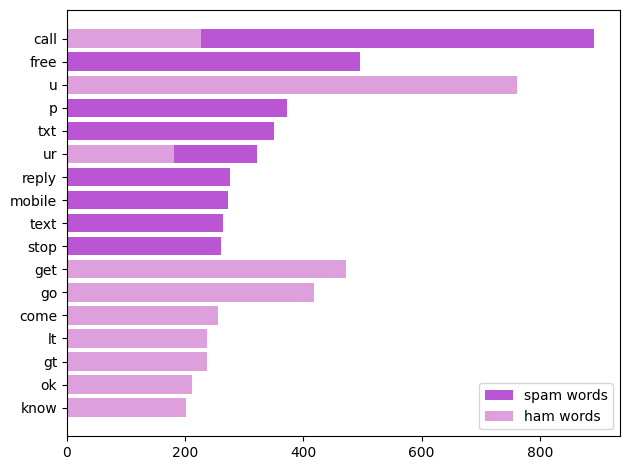

In [46]:
pt.barh(list(p.keys())[:10], list(p.values())[:10], color='mediumorchid')
pt.barh(list(q.keys())[:10], list(q.values())[:10], color='plum')
pt.gca().invert_yaxis()
pt.legend(['spam words', 'ham words'])
pt.tight_layout();